##  Итоговая работа

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]], np.int32)
raitings

array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
       [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
       [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
       [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
       [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
       [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
       [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
       [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
       [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
       [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [26]:
# a)

from sklearn.metrics import pairwise_distances
from numpy import linalg as LA
import sklearn.metrics

#x = sklearn.metrics.pairwise.cosine_distances(raitings)
pairwise_distances(raitings, metric = 'cosine')

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [27]:
for i, vector in enumerate(pairwise_distances(raitings, metric="cosine")):
    print(i, list(vector).index(np.min(vector[np.nonzero(vector)])))

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


In [6]:
# b) методы сжатия матрицы

# Анализ главных компонентов (PCA)

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit_transform(raitings)

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [7]:
# усеченый SVD (также известный как LSA)

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5)
svd.fit_transform(raitings)

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

In [8]:
# сингулярное разложение

U, s, V = np.linalg.svd(raitings)
n_component = 5
S = np.diag(s)[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))
print(S)

[[73.97894988  0.          0.          0.          0.        ]
 [ 0.         15.90026986  0.          0.          0.        ]
 [ 0.          0.         14.76407467  0.          0.        ]
 [ 0.          0.          0.         12.59396914  0.        ]
 [ 0.          0.          0.          0.         11.97537142]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [9]:
# вычисление производной (первой по умолчанию)
# scipy.misc.derivative(func, x0, dx=1.0, n=1, args=(), order=3)

from scipy.misc import derivative

def f(x):
    return np.tan(np.sin(x) + np.cos(2*x + 3))**2

derivative(f, 1.0, dx=1e-6)

55.3859176464222

Решение на бумаге

$ f'(x) = (tg^2(sin(x) + cos(2x+3)))'x = 2*tg(sin(x) + cos(2x+3))*(tg(sin(x) + cos(2x+3)))'x = 2*tg(sin(x) + cos(2x+3))*(sin(x) + cos(2x+3))'x / (cos^2(sin(x) + cos(2x+3))) = 2*tg(sin(x)+cos(2x+3))*(cos(x)-2*sin(2x+3)) / (cos^2(sin(x) + cos(2x+3))) = 2*tg(sin(1)+cos(5))*(cos(1)-2*sin(5)) / (cos^2(sin(1)+cos(5)))  = 55.38591763533786 $



In [10]:
# проверка счёта
import sympy 
from sympy import *

x = symbols('x') 
x = 1.0
y = 2*np.tan(np.sin(x)+np.cos(2*x+3))*(np.cos(x)-2*np.sin(2*x+3)) / (np.cos(np.sin(x) + np.cos(2*x+3)))**2
print(y)

55.38591763533786


### Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [2]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [3]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [4]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

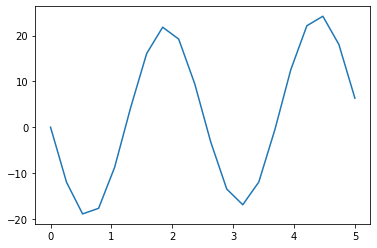

In [5]:
plt.plot(x, fx)
plt.show()

In [6]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [7]:
res = minimize(error, [0,0], method='COBYLA')
np.around(res.x,2)

array([ 3. , -2.5])

### Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [11]:
import random
import seaborn
import scipy.stats as sts

%matplotlib inline

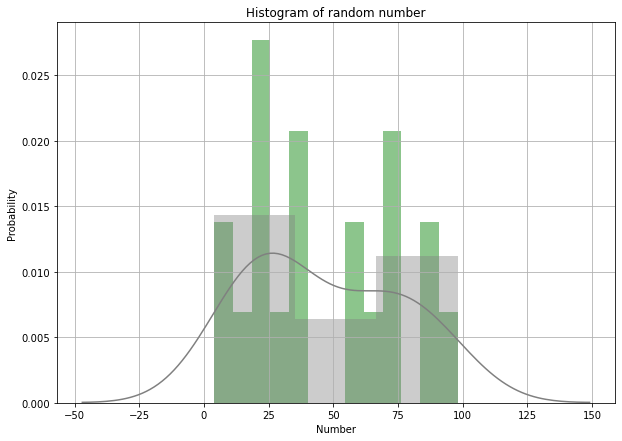

In [14]:
A = np.random.randint(100, size=20)   # случайная величина с 20-ю значениями

#A = sts.norm(0, 2.5)    # создание нормально распределенной случайной величины
#sam = A.rvs(size=20)

plt.figure(figsize=(10,7))
plt.hist(A, 13, density=1, facecolor='g', alpha=0.45)  # True = 1, False = 0  в "density"
plt.xlabel('Number')
plt.ylabel('Probability')
plt.title('Histogram of random number')
seaborn.distplot(A, kde=True, color='grey')     #плотность распределения
plt.grid(True)
plt.show()    # дополнительно к заданию построю распределение A

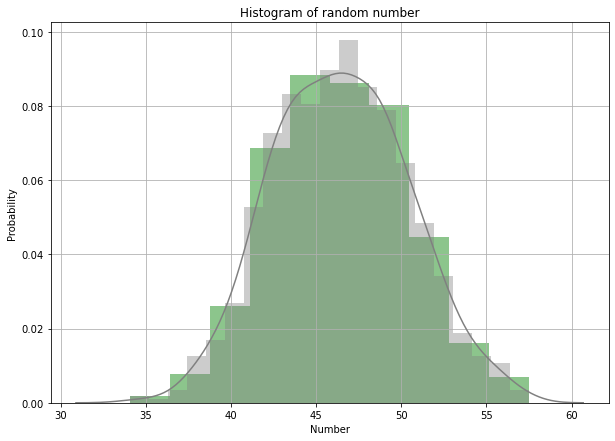

In [15]:
a = np.array([])  # создадим пустой массив для наполнения средними
for n in range(1000):
    B = np.random.choice(A, size=50, replace=True)
    mean = np.mean(B)  # среднее арифметическое элементов массива
    a = np.append(a, mean)  # добавляем в массив
    
plt.figure(figsize=(10,7))
plt.hist(a, 10, density=1, facecolor='g', alpha=0.45)  # True = 1, False = 0  в "density"
plt.xlabel('Number')
plt.ylabel('Probability')
plt.title('Histogram of random number')
plt.grid(True)
seaborn.distplot(a, kde=True, color='grey')   # плотность распределения
plt.show()


# при достаточно большом количестве n распределение средних выборок распределено нормально (ЦПТ)

### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]

In [16]:
A = np.array([[1,4], [1,1]])
A

array([[1, 4],
       [1, 1]])

Функция linalg.eig() вычисляет собственные числа (значения) и собственные векторы квадратной матрицы.

In [17]:
w, v = np.linalg.eig(A)

In [18]:
# собственные значения
print(w)

[ 3. -1.]


In [20]:
# собственные вектора
print(v)

[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


In [21]:
for i in range(len(w)):
    print('Собственное значение ' + str(round(w[i], 3)))
    print('Соответствующий ему собственный вектор ' + str(v[:, i]))
    print()

Собственное значение 3.0
Соответствующий ему собственный вектор [0.89442719 0.4472136 ]

Собственное значение -1.0
Соответствующий ему собственный вектор [-0.89442719  0.4472136 ]



**Решение "на бумаге"**

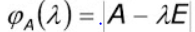

$ \phi_A(\lambda)= |\frac{(1-\lambda) ; 4)}{1; (1-\lambda)}| $ 

$ \phi_A(\lambda)= (1-\lambda)^2 - 4*1 = 1^2 - 2* 1*\lambda + \lambda^2 - 4 = \lambda^2 - 2\lambda - 3$

$ \phi_A(\lambda)= 0 $

$\lambda^2 - 2\lambda - 3 = 0$

$D = 16$

$\sqrt{D} = 4 $

$\lambda {1,2} = \frac{2 +_4}{2}$

**$\lambda1 = 3 $, $\lambda2 = -1 $    # **собственные значения матрицы A**

---
$Av = \lambda v$, $v !=0$

$\lambda = 3$

$|\frac{1;  4}{1;  1}|*|\frac{x[1]}{x[2]}| = 3*|\frac{x[1]}{x[2]}|$

$|\frac{x[1] + 4x[2]}{x[1] + x[2]}| = |\frac{3x[1]}{3x[2]}|$

$x[1] + 4x[2] = 3x[1]$     
$x[1] + x[2] = 3x[2] $     

$ x[1] = 2x[2] $

Допустим х[1] = 1, тогда х[2] = 0.5

____

$\lambda = -1$

$|\frac{1;  4}{1;  1}|*|\frac{x[1]}{x[2]}| = -|\frac{x[1]}{x[2]}|$

$|\frac{x[1] + 4x[2]}{x[1] + x[2]}| = |\frac{-x[1]}{-x[2]}|$

$x[1] + 4x[2] = -x[1]$     
$x[1] + x[2] = -x[2] $ 

$ x[1] = -2x[2] $

Допустим х[1] = 1, тогда х[2] = - 0.5

-----
**(или так)**

$(A - \lambda[1]E)*x  = 0$

$\lambda = 3$

$|\frac{1-3;  4}{1;  1-3}|*|\frac{x[1]}{x[2]}|  = |\frac{0}{0}|$

$|\frac{-2x[1];  4x[2]}{x[1];  -2x[2]}| = |\frac{0}{0}|$

$-2x[1] + 4x[2] = 0$
$x[1] - 2x[2] = 0$

$ x[1] = 2x[2] $

Допустим х[1] = 1, тогда х[2] = 0.5

_________

$\lambda = -1$

$|\frac{1+1;  4}{1;  1+1}|*|\frac{x[1]}{x[2]}|  = |\frac{0}{0}|$

$|\frac{2x[1];  4x[2]}{x[1];  2x[2]}| = |\frac{0}{0}|$

$2x[1] + 4x[2] = 0$
$x[1] + 2x[2] = 0$

$ x[1] = -2x[2]$

Допустим х[1] = 1, тогда х[2] = - 0.5